In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def newDensity(r, a = 1e-3, alpha = 0, beta = 2.2):
    return 1 / ((r / a) ** alpha * (1 + r / a) ** (beta - alpha))

def oldDensity(r, a = 1e-3, n = -2.2):
    try:
        if(r < a): return 1
        else: return (a / r) ** -n
    except ValueError:
        d = r.copy()
        d[r < a] = 1
        d[r >= a] = (a / r[r >= a]) ** -n
        return d

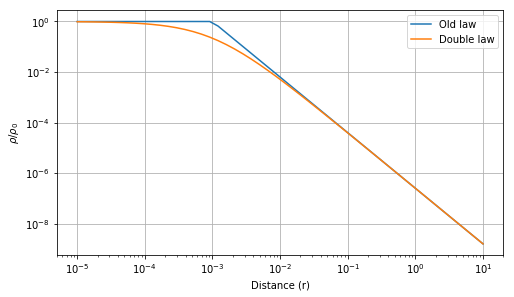

In [94]:
r = np.logspace(-5, 1)

rho_o = oldDensity(r)
rho_n = newDensity(r)

fig, ax = plt.subplots(figsize = (8, 4.5))

ax.plot(r, rho_o, label = 'Old law')
ax.plot(r, rho_n, label = 'Double law')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$\rho/\rho_0$')
ax.set_xlabel('Distance (r)')

ax.legend()

ax.grid()

In [40]:
import sympy as spy
spy.init_printing()

In [73]:
def gradient(Phi):
    global a_1, a_2, a_3, x, y, z, m, m_int, phi_x, phi_y, phi_z, phi_1, phi_2, phi_3
    phi = Phi.subs(m, m_int)
    dim = [x, y, z]
    phis = [phi_x, phi_y, phi_z]
    phis_ = [phi_1, phi_2, phi_3]
    
    r = []
    for (x_i, phi_x_i, phi_i) in zip(dim, phis, phis_):
        t = phi.diff(x_i).subs(m_int / a_1, m / a_1).subs(m_int ** 2, m ** 2).simplify()
        t = (t / phi_x_i).factor()
        r.append(t)
        
    if r[0] == r[1]:
        factor = r[0]
        matrix = spy.Matrix(phis_)
    else: 
        factor = 1
        matrix = spy.Matrix(r)
    return factor, matrix


In [74]:
G, tau, omega, gamma = spy.symbols(r'G \tau \omega \gamma', real = True, positive = True)
r, m, x, y, z, a_1, a_2, a_3, phi_1, phi_2, phi_3 = spy.symbols("r m x y z a_1 a_2 a_3 \phi_1 \phi_2 \phi_3",
                                                                real = True, positive = True)

m_int = [i ** 2 / (a ** 2 + tau) for (i, a) in zip([x, y, z], [a_1, a_2, a_3])]
m_int = spy.sqrt(a_1 ** 2 * sum(m_int))

phi_x = x / (spy.sqrt(tau + a_1 ** 2) ** 3 * spy.sqrt(tau + a_2 ** 2) * spy.sqrt(tau + a_3 ** 2))
phi_y = y / (spy.sqrt(tau + a_2 ** 2) ** 3 * spy.sqrt(tau + a_1 ** 2) * spy.sqrt(tau + a_3 ** 2))
phi_z = z / (spy.sqrt(tau + a_3 ** 2) ** 3 * spy.sqrt(tau + a_1 ** 2) * spy.sqrt(tau + a_2 ** 2))

In [79]:
r_0, rho_0, m, n, G = spy.symbols(r'r_0 rho_0 m n G', positive = True, real = True)

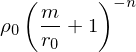

In [86]:
rho = rho_0 * (1 + m / r_0)**-n
rho

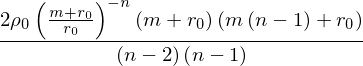

In [85]:
phi = (2 * rho_0 * (r_0 + m) * ((r_0 + m) / r_0) ** -n * (r_0 + (n - 1) * m)) / ((n - 2) * (n - 1))
phi

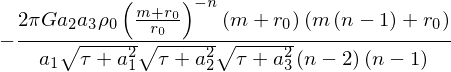

In [81]:
phi = - spy.pi * G * (a_2 * a_3 / a_1) * phi * 1 / spy.sqrt((tau + a_1 ** 2) * (tau + a_2 ** 2) * (tau + a_3 ** 2))
phi


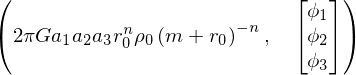

In [82]:
gradient(phi)